# Capstone Project - The Battle of Neighborhoods (Week 2)

## Install beautifulsoup for web scraping and folium for data visualisation

In [1]:
!conda install -c anaconda beautifulsoup4

!conda install -c conda-forge folium=0.5.0 --yes

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - beautifulsoup4


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    certifi-2019.6.16          |           py36_1         156 KB  anaconda
    beautifulsoup4-4.8.0       |           py36_0         147 KB  anaconda
    openssl-1.1.1              |       h7b6447c_0         5.0 MB  anaconda
    ca-certificates-2019.5.15  |                1         134 KB  anaconda
    ------------------------------------------------------------
                                           Total:         5.5 MB

The following packages will be UPDATED:

    beautifulsoup4:  4.7.1-py36_1      --> 4.8.0-py36_0     anaconda
    ca-certificates: 2019.5.15-1       --> 2019.5.15-1      anaconda
    certifi:         2019.6.16-py36_1  --> 2019.6.16-py36_1 anaconda
    openssl:         1.1.1c-h7b

## Import necessary libraries

In [2]:
import urllib
from bs4 import BeautifulSoup
import numpy as np
import pandas as pd

## Install libraries for clustering and visualisation on a map

In [18]:
!conda install -c conda-forge geopy --yes
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes 
import folium # map rendering library

print('Libraries imported.')

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    geographiclib-1.49         |             py_0          32 KB  conda-forge
    geopy-1.20.0               |             py_0          57 KB  conda-forge
    ------------------------------------------------------------
                                           Total:          90 KB

The following NEW packages will be INSTALLED:

    geographiclib: 1.49-py_0   conda-forge
    geopy:         1.20.0-py_0 conda-forge


geographiclib-1.49   | 32 KB     | ##################################### | 100% 
geopy-1.20.0         | 57 KB     | ##################################### | 100% 
Preparing transaction: done
Verifying transaction: done
Executing transaction: done
Libraries imported.


## Start scraping the page for information

__Read into BeautifulSoup__

In [19]:
url = "https://en.wikipedia.org/wiki/Planning_Areas_of_Singapore"
html = urllib.request.urlopen(url).read()
soup = BeautifulSoup(html)

__Cleaning of content__

In [20]:
for script in soup(["script", "style"]):
    script.extract()

In [21]:
td_tag = soup.find_all('td')
td_tag

[<td colspan="2" style="text-align:center;font-weight: bold;"><span style="font-weight: normal;">Also known as:</span><br/>新加坡的规划区 (<a href="/wiki/Chinese_language" title="Chinese language">Chinese</a>)<br/>Kawasan Perancangan Singapura (<a href="/wiki/Malay_language" title="Malay language">Malay</a>)<br/>சிங்கப்பூர் திட்ட விரிவாக்கப் பகுதிகள் (<a href="/wiki/Tamil_language" title="Tamil language">Tamil</a>)</td>,
 <td colspan="2" style="text-align:center"><a class="image" href="/wiki/File:Singapore_MP2008._Urban_Planning_Areas.svg"><img alt="Singapore MP2008. Urban Planning Areas.svg" data-file-height="452" data-file-width="710" decoding="async" height="191" src="//upload.wikimedia.org/wikipedia/commons/thumb/c/c1/Singapore_MP2008._Urban_Planning_Areas.svg/300px-Singapore_MP2008._Urban_Planning_Areas.svg.png" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/c/c1/Singapore_MP2008._Urban_Planning_Areas.svg/450px-Singapore_MP2008._Urban_Planning_Areas.svg.png 1.5x, //upload.wikimed

In [22]:
for tag in td_tag:
    if tag.a:
        tag.a.unwrap()
td_tag

[<td colspan="2" style="text-align:center;font-weight: bold;"><span style="font-weight: normal;">Also known as:</span><br/>新加坡的规划区 (Chinese)<br/>Kawasan Perancangan Singapura (<a href="/wiki/Malay_language" title="Malay language">Malay</a>)<br/>சிங்கப்பூர் திட்ட விரிவாக்கப் பகுதிகள் (<a href="/wiki/Tamil_language" title="Tamil language">Tamil</a>)</td>,
 <td colspan="2" style="text-align:center"><img alt="Singapore MP2008. Urban Planning Areas.svg" data-file-height="452" data-file-width="710" decoding="async" height="191" src="//upload.wikimedia.org/wikipedia/commons/thumb/c/c1/Singapore_MP2008._Urban_Planning_Areas.svg/300px-Singapore_MP2008._Urban_Planning_Areas.svg.png" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/c/c1/Singapore_MP2008._Urban_Planning_Areas.svg/450px-Singapore_MP2008._Urban_Planning_Areas.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/c/c1/Singapore_MP2008._Urban_Planning_Areas.svg/600px-Singapore_MP2008._Urban_Planning_Areas.svg.png 2x" widt

In [23]:
for tag in td_tag:
    if tag.div:
        tag.div.unwrap()
td_tag

[<td colspan="2" style="text-align:center;font-weight: bold;"><span style="font-weight: normal;">Also known as:</span><br/>新加坡的规划区 (Chinese)<br/>Kawasan Perancangan Singapura (<a href="/wiki/Malay_language" title="Malay language">Malay</a>)<br/>சிங்கப்பூர் திட்ட விரிவாக்கப் பகுதிகள் (<a href="/wiki/Tamil_language" title="Tamil language">Tamil</a>)</td>,
 <td colspan="2" style="text-align:center"><img alt="Singapore MP2008. Urban Planning Areas.svg" data-file-height="452" data-file-width="710" decoding="async" height="191" src="//upload.wikimedia.org/wikipedia/commons/thumb/c/c1/Singapore_MP2008._Urban_Planning_Areas.svg/300px-Singapore_MP2008._Urban_Planning_Areas.svg.png" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/c/c1/Singapore_MP2008._Urban_Planning_Areas.svg/450px-Singapore_MP2008._Urban_Planning_Areas.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/c/c1/Singapore_MP2008._Urban_Planning_Areas.svg/600px-Singapore_MP2008._Urban_Planning_Areas.svg.png 2x" widt

__Getting required information__

In [24]:
td_tag_list = list(td_tag)
td_tag_list = td_tag_list[12:507]
td_tag_list

[<td>Ang Mo Kio
 </td>, <td>
 </td>, <td>宏茂桥
 </td>, <td>Hóng mào qiáo
 </td>, <td>ஆங் மோ கியோ
 </td>, <td>North-East
 </td>, <td>13.94
 </td>, <td>165,710
 </td>, <td>12,000
 </td>, <td>Bedok
 </td>, <td>*
 </td>, <td>勿洛
 </td>, <td>Wù luò
 </td>, <td>பிடோக்
 </td>, <td>East
 </td>, <td>21.69
 </td>, <td>281,300
 </td>, <td>13,000
 </td>, <td>Bishan
 </td>, <td>
 </td>, <td>碧山
 </td>, <td>Bì shān
 </td>, <td>பீஷான்
 </td>, <td>Central
 </td>, <td>7.62
 </td>, <td>88,490
 </td>, <td>12,000
 </td>, <td>Boon Lay
 </td>, <td>
 </td>, <td>文礼
 </td>, <td>Wén lǐ
 </td>, <td>பூன் லே
 </td>, <td>West
 </td>, <td>8.23
 </td>, <td>30
 </td>, <td>3.6
 </td>, <td>Bukit Batok
 </td>, <td>*
 </td>, <td>武吉巴督
 </td>, <td>Wǔjí bā dū
 </td>, <td>புக்கிட் பாத்தோக்
 </td>, <td>West
 </td>, <td>11.13
 </td>, <td>144,410
 </td>, <td>13,000
 </td>, <td>Bukit Merah
 </td>, <td>*
 </td>, <td>红山
 </td>, <td>Hóng shān
 </td>, <td>புக்கிட் மேரா
 </td>, <td>Central
 </td>, <td>14.34
 </td>, <td>151,870
 </td>, <td

__Check length__

In [25]:
len(td_tag_list)

495

__Remove HTML formatting__

In [26]:
td_tag_list = [str(item)[4:-6] for item in td_tag_list]
td_tag_list

['Ang Mo Kio',
 '',
 '宏茂桥',
 'Hóng mào qiáo',
 'ஆங் மோ கியோ',
 'North-East',
 '13.94',
 '165,710',
 '12,000',
 'Bedok',
 '*',
 '勿洛',
 'Wù luò',
 'பிடோக்',
 'East',
 '21.69',
 '281,300',
 '13,000',
 'Bishan',
 '',
 '碧山',
 'Bì shān',
 'பீஷான்',
 'Central',
 '7.62',
 '88,490',
 '12,000',
 'Boon Lay',
 '',
 '文礼',
 'Wén lǐ',
 'பூன் லே',
 'West',
 '8.23',
 '30',
 '3.6',
 'Bukit Batok',
 '*',
 '武吉巴督',
 'Wǔjí bā dū',
 'புக்கிட் பாத்தோக்',
 'West',
 '11.13',
 '144,410',
 '13,000',
 'Bukit Merah',
 '*',
 '红山',
 'Hóng shān',
 'புக்கிட் மேரா',
 'Central',
 '14.34',
 '151,870',
 '11,000',
 'Bukit Panjang',
 '*',
 '武吉班让',
 'Wǔjí bān ràng',
 'பக்கிட் பஞ்சாங்',
 'West',
 '8.99',
 '140,820',
 '16,000',
 'Bukit Timah',
 '*',
 '武吉知马',
 'Wǔjí zhī mǎ',
 'புக்கித் திமா',
 'Central',
 '17.53',
 '77,280',
 '4,400',
 'Central Water Catchment',
 'Kawasan Tadahan Air Tengah',
 '中央集水区',
 'Zhōngyāng jí shuǐ qū',
 'மத்திய நீர் நீர்ப்பிடிப்பு',
 'North',
 '37.15',
 '*',
 '*',
 'Changi',
 '*',
 '樟宜',
 'Zhāng yí',
 'ச

__Filter irrelevant information__

In [27]:
td_tag_list = [td_tag_list[i] for i in range(len(td_tag_list)) if (i % 9 == 0 or i % 9 == 5 or i % 9 == 7)]
td_tag_list

['Ang Mo Kio',
 'North-East',
 '165,710',
 'Bedok',
 'East',
 '281,300',
 'Bishan',
 'Central',
 '88,490',
 'Boon Lay',
 'West',
 '30',
 'Bukit Batok',
 'West',
 '144,410',
 'Bukit Merah',
 'Central',
 '151,870',
 'Bukit Panjang',
 'West',
 '140,820',
 'Bukit Timah',
 'Central',
 '77,280',
 'Central Water Catchment',
 'North',
 '*',
 'Changi',
 'East',
 '2,080',
 'Changi Bay',
 'East',
 '*',
 'Choa Chu Kang',
 'West',
 '187,510',
 'Clementi',
 'West',
 '93,000',
 'Downtown Core',
 'Central',
 '2,510',
 'Geylang',
 'Central',
 '111,610',
 'Hougang',
 'North-East',
 '223,010',
 'Jurong East',
 'West',
 '81,180',
 'Jurong West',
 'West',
 '266,720',
 'Kallang',
 'Central',
 '101,420',
 'Lim Chu Kang',
 'North',
 '110',
 'Mandai',
 'North',
 '2,090',
 'Marina East',
 'Central',
 '*',
 'Marina South',
 'Central',
 '*',
 'Marine Parade',
 'Central',
 '47,250',
 'Museum',
 'Central',
 '420',
 'Newton',
 'Central',
 '7,640',
 'North-Eastern Islands',
 'North-East',
 '50',
 'Novena',
 'Central'

Load data into pandas DataFrame

In [28]:
rep_list = []
for i in range(len(td_tag_list)):
    if td_tag_list[i] == '*':
        rep_list.append(i)
    else:
        td_tag_list[i] = str(td_tag_list[i]).replace(",","")
for i in rep_list:
    td_tag_list[i] = '0'
td_tag_list

['Ang Mo Kio',
 'North-East',
 '165710',
 'Bedok',
 'East',
 '281300',
 'Bishan',
 'Central',
 '88490',
 'Boon Lay',
 'West',
 '30',
 'Bukit Batok',
 'West',
 '144410',
 'Bukit Merah',
 'Central',
 '151870',
 'Bukit Panjang',
 'West',
 '140820',
 'Bukit Timah',
 'Central',
 '77280',
 'Central Water Catchment',
 'North',
 '0',
 'Changi',
 'East',
 '2080',
 'Changi Bay',
 'East',
 '0',
 'Choa Chu Kang',
 'West',
 '187510',
 'Clementi',
 'West',
 '93000',
 'Downtown Core',
 'Central',
 '2510',
 'Geylang',
 'Central',
 '111610',
 'Hougang',
 'North-East',
 '223010',
 'Jurong East',
 'West',
 '81180',
 'Jurong West',
 'West',
 '266720',
 'Kallang',
 'Central',
 '101420',
 'Lim Chu Kang',
 'North',
 '110',
 'Mandai',
 'North',
 '2090',
 'Marina East',
 'Central',
 '0',
 'Marina South',
 'Central',
 '0',
 'Marine Parade',
 'Central',
 '47250',
 'Museum',
 'Central',
 '420',
 'Newton',
 'Central',
 '7640',
 'North-Eastern Islands',
 'North-East',
 '50',
 'Novena',
 'Central',
 '48950',
 'Orcha

In [29]:
sg_area_df = pd.DataFrame(np.array(td_tag_list).reshape(55,3), columns = ["Neighbourhood", "Region", "Population"])
sg_area_df["Population"] = pd.to_numeric(sg_area_df["Population"])
sg_area_df

,Neighbourhood,Region,Population
0,Ang Mo Kio,North-East,165710
1,Bedok,East,281300
2,Bishan,Central,88490
3,Boon Lay,West,30
4,Bukit Batok,West,144410
5,Bukit Merah,Central,151870
6,Bukit Panjang,West,140820
7,Bukit Timah,Central,77280
8,Central Water Catchment,North,0
9,Changi,East,2080


In [30]:
sg_area_df.describe()

,Population
count,55.000000
mean,72624.000000
std,88304.424485
min,0.000000
25%,180.000000
50%,20030.000000
75%,130650.000000
max,281300.000000


__There are no or very few residents in some neighbourhood. Including those outliers will likely introduce error to our model. So, we will remove neighbourhoods with 50 residents or less.__

In [31]:
sg_area_df = sg_area_df[sg_area_df.Population > 50]
sg_area_df.reset_index(drop=True, inplace=True)
sg_area_df

,Neighbourhood,Region,Population
0,Ang Mo Kio,North-East,165710
1,Bedok,East,281300
2,Bishan,Central,88490
3,Bukit Batok,West,144410
4,Bukit Merah,Central,151870
5,Bukit Panjang,West,140820
6,Bukit Timah,Central,77280
7,Changi,East,2080
8,Choa Chu Kang,West,187510
9,Clementi,West,93000


In [32]:
sg_area_df.describe()

,Population
count,44.000000
mean,90776.818182
std,90036.012634
min,70.000000
25%,2405.000000
50%,84280.000000
75%,148157.500000
max,281300.000000


In [121]:
# The code was removed by Watson Studio for sharing.

/opt/conda/envs/Python36/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [34]:
# The code was removed by Watson Studio for sharing.

__Adding coordinates of neighbourhoods__

In [35]:
lat_list = []
lon_list = []

for i in range(len(sg_area_df.index)):
    address = str(sg_area_df.loc[i, "Neighbourhood"]) + ', ' + 'Singapore'
    geolocator = Nominatim(user_agent="sg_explorer")
    location = geolocator.geocode(address)
    lat_list.append(location.latitude)
    lon_list.append(location.longitude)

In [36]:
# The code was removed by Watson Studio for sharing.

In [37]:
# The code was removed by Watson Studio for sharing.

In [38]:
sg_area_df["Latitude"] = lat_list
sg_area_df["Longitude"] = lon_list

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


__Display the neighbourhoods and coordinates__

In [39]:
sg_area_df

,Neighbourhood,Region,Population,Latitude,Longitude
0,Ang Mo Kio,North-East,165710,1.369842,103.846609
1,Bedok,East,281300,1.323976,103.930216
2,Bishan,Central,88490,1.351452,103.848250
3,Bukit Batok,West,144410,1.349057,103.749591
4,Bukit Merah,Central,151870,1.282688,103.820249
5,Bukit Panjang,West,140820,1.377921,103.771866
6,Bukit Timah,Central,77280,1.331429,103.795563
7,Changi,East,2080,1.352516,103.987007
8,Choa Chu Kang,West,187510,1.389260,103.743728
9,Clementi,West,93000,1.314026,103.762410


__Define functions to get venues in a neighbourhood and their locations__

In [47]:
LIMIT = 100 # limit of number of venues returned by Foursquare API
RADIUS = 750
COUNTRY = "Singapore"

In [48]:
def getNearbyVenues(names):
    
    venues_list=[]
    for name in names:
        print(name)
        latitude = sg_area_df.loc[sg_area_df.index[sg_area_df['Neighbourhood'] == name], 'Latitude'].tolist()[0]
        longitude = sg_area_df.loc[sg_area_df.index[sg_area_df['Neighbourhood'] == name], 'Longitude'].tolist()[0]
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            latitude,
            longitude,
            RADIUS,
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        #print(results)
        # return only relevant information for each nearby venue
        venues_list.append([(
            name,
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighbourhood',  
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [49]:
sg_venues = getNearbyVenues(names=sg_area_df['Neighbourhood'])
sg_venues

Ang Mo Kio
Bedok
Bishan
Bukit Batok
Bukit Merah
Bukit Panjang
Bukit Timah
Changi
Choa Chu Kang
Clementi
Downtown Core
Geylang
Hougang
Jurong East
Jurong West
Kallang
Lim Chu Kang
Mandai
Marine Parade
Museum
Newton
Novena
Orchard
Outram
Pasir Ris
Pioneer
Punggol
Queenstown
River Valley
Rochor
Seletar
Sembawang
Sengkang
Serangoon
Singapore River
Southern Islands
Sungei Kadut
Tampines
Tanglin
Toa Payoh
Tuas
Western Water Catchment
Woodlands
Yishun


,Neighbourhood,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Ang Mo Kio,A&W,1.369541,103.849043,Fast Food Restaurant
1,Ang Mo Kio,Old Chang Kee,1.369094,103.848389,Snack Place
2,Ang Mo Kio,Subway,1.369136,103.847612,Sandwich Place
3,Ang Mo Kio,NTUC FairPrice,1.371507,103.847082,Supermarket
4,Ang Mo Kio,Face Ban Mian 非板面 (Ang Mo Kio),1.372031,103.847504,Noodle House
5,Ang Mo Kio,FairPrice Xtra,1.369279,103.848886,Supermarket
6,Ang Mo Kio,Kam Jia Zhuang Restaurant,1.368167,103.844118,Asian Restaurant
7,Ang Mo Kio,Xi Xiang Feng Yong Tau Foo 喜相逢酿豆腐,1.371975,103.846408,Chinese Restaurant
8,Ang Mo Kio,MOS Burger,1.369170,103.847831,Burger Joint
9,Ang Mo Kio,Bun Master,1.369242,103.849031,Bakery


__Check how many venues were returned for each neighborhood__

In [50]:
sg_venues.groupby('Neighbourhood').count()

,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighbourhood,,,,
Ang Mo Kio,64,64,64,64
Bedok,87,87,87,87
Bishan,51,51,51,51
Bukit Batok,33,33,33,33
Bukit Merah,59,59,59,59
Bukit Panjang,16,16,16,16
Bukit Timah,53,53,53,53
Changi,44,44,44,44
Choa Chu Kang,24,24,24,24


__Analyze each neighborhood__

In [51]:
# one hot encoding
sg_onehot = pd.get_dummies(sg_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
sg_onehot['Neighbourhood'] = sg_venues['Neighbourhood'] 

# move neighborhood column to the first column
fixed_columns = [sg_onehot.columns[-1]] + list(sg_onehot.columns[:-1])
sg_onehot = sg_onehot[fixed_columns]

sg_onehot

,Neighbourhood,ATM,Accessories Store,Airport,Airport Food Court,Airport Lounge,Airport Terminal,American Restaurant,Arcade,Art Gallery,...,Video Game Store,Vietnamese Restaurant,Water Park,Waterfront,Whisky Bar,Wine Bar,Wine Shop,Wings Joint,Yoga Studio,Zoo Exhibit
0,Ang Mo Kio,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Ang Mo Kio,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Ang Mo Kio,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Ang Mo Kio,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Ang Mo Kio,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,Ang Mo Kio,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,Ang Mo Kio,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,Ang Mo Kio,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,Ang Mo Kio,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,Ang Mo Kio,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


__Group rows by neighborhood and by taking the mean of the frequency of occurrence of each category__

In [52]:
sg_grouped = sg_onehot.groupby('Neighbourhood').mean().reset_index()
sg_grouped

,Neighbourhood,ATM,Accessories Store,Airport,Airport Food Court,Airport Lounge,Airport Terminal,American Restaurant,Arcade,Art Gallery,...,Video Game Store,Vietnamese Restaurant,Water Park,Waterfront,Whisky Bar,Wine Bar,Wine Shop,Wings Joint,Yoga Studio,Zoo Exhibit
0,Ang Mo Kio,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.00,0.000000,0.000000,0.000000
1,Bedok,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.011494,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.00,0.011494,0.000000,0.000000
2,Bishan,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.00,0.000000,0.000000,0.000000
3,Bukit Batok,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.00,0.000000,0.000000,0.000000
4,Bukit Merah,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.00,0.000000,0.000000,0.000000
5,Bukit Panjang,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.00,0.000000,0.000000,0.000000
6,Bukit Timah,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00,0.018868,0.00,0.000000,0.000000,0.000000
7,Changi,0.000000,0.000000,0.068182,0.022727,0.136364,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.00,0.000000,0.000000,0.000000
8,Choa Chu Kang,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.00,0.000000,0.000000,0.000000
9,Clementi,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.012658,0.000000,0.000000,...,0.012658,0.000000,0.000000,0.000000,0.00,0.000000,0.00,0.012658,0.000000,0.000000


__Get the type of venues returned by Foursquare.__

In [53]:
columns = sg_grouped.columns.tolist()
columns

['Neighbourhood',
 'ATM',
 'Accessories Store',
 'Airport',
 'Airport Food Court',
 'Airport Lounge',
 'Airport Terminal',
 'American Restaurant',
 'Arcade',
 'Art Gallery',
 'Art Museum',
 'Arts & Crafts Store',
 'Asian Restaurant',
 'Athletics & Sports',
 'Australian Restaurant',
 'BBQ Joint',
 'Bagel Shop',
 'Bakery',
 'Bank',
 'Bar',
 'Basketball Court',
 'Basketball Stadium',
 'Bay',
 'Beach',
 'Bed & Breakfast',
 'Beer Bar',
 'Beer Garden',
 'Bike Trail',
 'Bistro',
 'Boarding House',
 'Bookstore',
 'Border Crossing',
 'Boutique',
 'Bowling Alley',
 'Breakfast Spot',
 'Brewery',
 'Bridge',
 'Bubble Tea Shop',
 'Buffet',
 'Building',
 'Burger Joint',
 'Burrito Place',
 'Bus Line',
 'Bus Station',
 'Bus Stop',
 'Butcher',
 'Cafeteria',
 'Café',
 'Campground',
 'Canal',
 'Candy Store',
 'Cantonese Restaurant',
 'Casino',
 'Cha Chaan Teng',
 'Chinese Breakfast Place',
 'Chinese Restaurant',
 'Chocolate Shop',
 'Churrascaria',
 'Clothing Store',
 'Club House',
 'Cocktail Bar',
 'Coffe

__Manually filter food category. Only keep venues related to food.__

In [59]:
food = ['American Restaurant', 'Asian Restaurant', 'BBQ Joint', 'Bagel Shop', 'Bakery', 'Bar', 'Beer Garden', 'Bistro', 'Breakfast Spot', 'Brewery', 'Bubble Tea Shop', 'Buffet', 'Burger Joint', 'Burrito Place', 'Café', 'Candy Store', 'Cantonese Restaurant', 'Cha Chaan Teng', 'Chinese Breakfast Place', 'Chinese Restaurant', 'Chocolate Shop', 'Churrascaria', 'Cocktail Bar', 'Coffee Shop', 'Comfort Food Restaurant', 'Creperie', 'Deli / Bodega', 'Dessert Shop', 'Dim Sum Restaurant', 'Diner', 'Dive Bar', 'Donut Shop', 'Dumpling Restaurant', 'Falafel Restaurant', 'Fast Food Restaurant', 'Food', 'Food & Drink Shop', 'Food Court', 'Food Stand', 'Food Truck', 'French Restaurant', 'Fried Chicken Joint', 'Frozen Yogurt Shop', 'Gastropub', 'German Restaurant', 'Hainan Restaurant', 'Halal Restaurant', 'Hong Kong Restaurant', 'Hookah Bar', 'Hotpot Restaurant', 'Ice Cream Shop', 'Indian Restaurant', 'Indonesian Restaurant', 'Italian Restaurant', 'Japanese Curry Restaurant', 'Japanese Restaurant', 'Juice Bar', 'Korean Restaurant', 'Malay Restaurant', 'Mediterranean Restaurant', 'Mexican Restaurant', 'Middle Eastern Restaurant', 'Modern European Restaurant', 'Noodle House', 'Pizza Place', 'Portuguese Restaurant', 'Post Office', 'Pub', 'Ramen Restaurant', 'Restaurant', 'Sake Bar', 'Salad Place', 'Sandwich Place', 'Seafood Restaurant', 'Snack Place', 'Soup Place', 'Spanish Restaurant', 'Sports Bar', 'Steakhouse', 'Sushi Restaurant', 'Szechuan Restaurant', 'Tea Room', 'Thai Restaurant', 'Udon Restaurant', 'Vegetarian / Vegan Restaurant', 'Vietnamese Restaurant', 'Whisky Bar', 'Wine Bar', 'Wine Shop', 'Wings Joint']

In [60]:
sg_food_data = pd.DataFrame()

In [61]:
for item in food:
    sg_food_data[item] = sg_grouped[item]

__This is the food data.__

In [62]:
sg_food_data

,American Restaurant,Asian Restaurant,BBQ Joint,Bagel Shop,Bakery,Bar,Beer Garden,Bistro,Breakfast Spot,Brewery,...,Szechuan Restaurant,Tea Room,Thai Restaurant,Udon Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Whisky Bar,Wine Bar,Wine Shop,Wings Joint
0,0.000000,0.015625,0.000000,0.000000,0.015625,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00,0.000000,0.000000,0.00,0.015625,0.000000,0.00,0.000000,0.00,0.000000
1,0.011494,0.022989,0.000000,0.000000,0.045977,0.000000,0.000000,0.000000,0.011494,0.000000,...,0.00,0.000000,0.022989,0.00,0.022989,0.000000,0.00,0.000000,0.00,0.011494
2,0.000000,0.019608,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00,0.000000,0.039216,0.00,0.000000,0.000000,0.00,0.000000,0.00,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00,0.000000,0.000000,0.00,0.030303,0.000000,0.00,0.000000,0.00,0.000000
4,0.000000,0.016949,0.016949,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00,0.000000,0.000000,0.00,0.000000,0.000000,0.00,0.000000,0.00,0.000000
5,0.000000,0.000000,0.000000,0.000000,0.062500,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00,0.000000,0.000000,0.00,0.000000,0.000000,0.00,0.000000,0.00,0.000000
6,0.000000,0.018868,0.018868,0.000000,0.037736,0.018868,0.018868,0.000000,0.000000,0.000000,...,0.00,0.018868,0.018868,0.00,0.000000,0.000000,0.00,0.018868,0.00,0.000000
7,0.000000,0.000000,0.000000,0.000000,0.022727,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00,0.022727,0.000000,0.00,0.000000,0.000000,0.00,0.000000,0.00,0.000000
8,0.000000,0.041667,0.000000,0.000000,0.041667,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00,0.000000,0.041667,0.00,0.000000,0.000000,0.00,0.000000,0.00,0.000000
9,0.012658,0.037975,0.012658,0.000000,0.012658,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00,0.000000,0.012658,0.00,0.000000,0.000000,0.00,0.000000,0.00,0.012658


__Put into a pandas dataframe__

In [63]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

__Create the new dataframe and display the top 10 venues for each neighborhood.__

In [88]:
num_top_venues = 1

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighbourhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighbourhoods_venues_sorted = pd.DataFrame(columns=columns)
neighbourhoods_venues_sorted['Neighbourhood'] = sg_area_df['Neighbourhood']

for ind in np.arange(sg_food_data.shape[0]):
    neighbourhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(sg_food_data.iloc[ind, :], num_top_venues)

neighbourhoods_venues_sorted

,Neighbourhood,1st Most Common Venue
0,Ang Mo Kio,Food Court
1,Bedok,Coffee Shop
2,Bishan,Coffee Shop
3,Bukit Batok,Food Court
4,Bukit Merah,Chinese Restaurant
5,Bukit Panjang,Food Court
6,Bukit Timah,Food Court
7,Changi,Coffee Shop
8,Choa Chu Kang,Fast Food Restaurant
9,Clementi,Coffee Shop


__Cluster Neighborhood  
Let's try run k-means to cluster the neighborhood into k clusters and calculate the errors.__

In [79]:
import math

In [110]:
# set number of clusters

errors = []

for kclusters in range(1,20):
    # run k-means clustering
    error = 0
    kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(sg_food_data)
    labels = kmeans.labels_[0:44]
    centers = kmeans.cluster_centers_
    for i in range(sg_food_data.shape[0]):
        for j in range(sg_food_data.shape[1]):
            error += (sg_food_data.iloc[i, j] - centers[labels[i]][j])**2
    errors.append(math.sqrt(error))

In [111]:
errors

[1.5254874094778068,
 1.1439371730050059,
 1.0288791259339902,
 0.9107725575878837,
 0.8428471785703191,
 0.8003489997860174,
 0.7695706470207746,
 0.7237354257873563,
 0.7020200719518986,
 0.6770116628454509,
 0.6522241391559914,
 0.6400867822331314,
 0.6187078808057248,
 0.5960632725473077,
 0.569144572993675,
 0.5562583063748473,
 0.5400463517852875,
 0.51389215278748,
 0.5017682818102044]

__Import necessary libraries to plot the errors against cluster size__

In [112]:
import matplotlib.pyplot as plt

In [113]:
errors.reverse()
errors.append(0)
errors.reverse()

In [114]:
errdf = pd.DataFrame(errors)
errdf.drop(0, inplace = True)

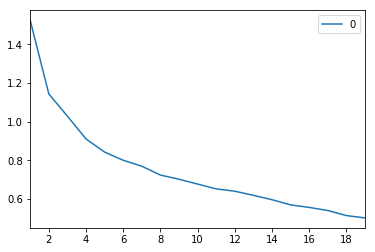

In [115]:
errdf.plot.line()

We can see after k = 8, the decrease in errors with the increase of cluster size almost become linear.  
Hence we will choose to use __k = 8.__

__Create a new dataframe that includes the cluster as well as the top venue for each neighborhood.__

In [116]:
kclusters = 8

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(sg_food_data)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:sg_food_data.shape[0]]

array([1, 4, 4, 1, 4, 1, 0, 0, 1, 4, 0, 4, 1, 4, 4, 0, 0, 5, 4, 0, 4, 4,
       0, 4, 4, 2, 4, 4, 0, 7, 6, 4, 1, 7, 0, 0, 0, 0, 0, 4, 3, 0, 4, 4],
      dtype=int32)

In [117]:
# add clustering labels
neighbourhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

In [118]:
sg_merged = sg_area_df

sg_merged = sg_merged.join(neighbourhoods_venues_sorted.set_index('Neighbourhood'), on='Neighbourhood')

sg_merged

,Neighbourhood,Region,Population,Latitude,Longitude,Cluster Labels,1st Most Common Venue
0,Ang Mo Kio,North-East,165710,1.369842,103.846609,1,Food Court
1,Bedok,East,281300,1.323976,103.930216,4,Coffee Shop
2,Bishan,Central,88490,1.351452,103.848250,4,Coffee Shop
3,Bukit Batok,West,144410,1.349057,103.749591,1,Food Court
4,Bukit Merah,Central,151870,1.282688,103.820249,4,Chinese Restaurant
5,Bukit Panjang,West,140820,1.377921,103.771866,1,Food Court
6,Bukit Timah,Central,77280,1.331429,103.795563,0,Food Court
7,Changi,East,2080,1.352516,103.987007,0,Coffee Shop
8,Choa Chu Kang,West,187510,1.389260,103.743728,1,Fast Food Restaurant
9,Clementi,West,93000,1.314026,103.762410,4,Coffee Shop


__Display the map with cluster labels__

In [120]:
# create map
map_clusters_names = folium.Map(location=[1.304, 103.846], zoom_start=12)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster, cuisine in zip(sg_merged['Latitude'], sg_merged['Longitude'], sg_merged['Neighbourhood'], sg_merged['Cluster Labels'], sg_merged['1st Most Common Venue']):
    label = folium.Popup(str(poi) + " - " + str(cuisine), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters_names)

# display map
map_clusters_names

We can find out that generally:
1. Red neighbourhoods like International cuisine and more upscale restaurants;
2. Cyan neighbourhoods like Chinese restaurants;
3. Purple neighbourhoods like local food court;
4. Orange neighbourhoods like South Asian food;
5. The rest 4 neighbourhoods are alone inside its kind, thus not very representative.